<h1 class='font-effect-3d-float' style='font-family:Akronim; color:#FF9966; font-size:250%;'>Styling, Links, Helpful Functions, & Code Modules</h1>
#### [Github Repository](https://github.com/OlgaBelitskaya/deep_learning_projects/tree/master/DL_PP2) & [Full Version. Python](https://olgabelitskaya.github.io/kaggle_letters.html) & [Full Version. R](https://olgabelitskaya.github.io/kaggle_letters_R.html)

In [1]:
library(IRdisplay); library(repr)
library(tensorflow); library(keras)
library(imager); library(R6)
keras_backend<-backend()

Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following object is masked from ‘package:IRdisplay’:

    display

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image



In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d-float');
body {background-color:#AAF0D1;} 
a,h4 {color:#FF9966; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt {color:#FF9966;} 
div.input_prompt {color:#66FF66;} 
div.output_area pre,div.output_subarea {font-size:15px; color:#FF9966;}
div.output_stderr pre {background-color:#AAF0D1;}
</style>")

In [3]:
fw<-"best_letters.h5"
gray_image_loading<-function(image_path) {
    image<-keras::image_load(image_path,
                             target_size=c(32,32),
                             grayscale=T)
    image<-image_to_array(image)/255
    image<-array_reshape(image,c(1,dim(image)))
    return(image) }

<h1 class='font-effect-3d-float' style='font-family:Akronim; color:#FF9966; font-size:250%;'> Data Loading and Exploring </h1>

In [4]:
letters1<-read.csv("../input/letters.csv")
letters2<-read.csv("../input/letters2.csv")
letters3<-read.csv("../input/letters3.csv")
image_paths1<-list.files("../input/letters",recursive=TRUE,full.names=TRUE)
image_paths1<-image_paths1[1:(length(image_paths1))]
image_paths2<-list.files("../input/letters2",recursive=TRUE,full.names=TRUE)
image_paths2<-image_paths2[1:(length(image_paths2))]
image_paths3<-list.files("../input/letters3",recursive=TRUE,full.names=TRUE)
image_paths3<-image_paths3[1:(length(image_paths3))]
letter_labels1<-as.matrix(letters1["label"])
letter_labels2<-as.matrix(letters2["label"])
letter_labels3<-as.matrix(letters3["label"])
cletter_labels1<-keras::to_categorical(letter_labels1-1,33)
cletter_labels2<-keras::to_categorical(letter_labels2-1,33)
cletter_labels3<-keras::to_categorical(letter_labels3-1,33)
letter_images1<-lapply(image_paths1,gray_image_loading)
letter_images2<-lapply(image_paths2,gray_image_loading)
letter_images3<-lapply(image_paths3,gray_image_loading)
letter_images1<-array_reshape(letter_images1,c(-1,32*32))
letter_images2<-array_reshape(letter_images2,c(-1,32*32))
letter_images3<-array_reshape(letter_images3,c(-1,32*32))

In [5]:
head(letters3,3); head(image_paths3,3);
c(dim(letter_images1),dim(letter_labels1),dim(cletter_labels1),
  dim(letter_images2),dim(letter_labels2),dim(cletter_labels2),
  dim(letter_images3),dim(letter_labels3),dim(cletter_labels3))

letter,label,file,background
а,1,01_231.png,3
а,1,01_232.png,3
а,1,01_233.png,3


[1] "../input/letters3/01_231.png" "../input/letters3/01_232.png"
[3] "../input/letters3/01_233.png"

[1] 1650 1024 1650    1 1650   33 5940 1024 5940    1 5940   33 6600 1024 6600
[16]    1 6600   33

In [6]:
letter_images<-rbind(letter_images1,letter_images2)
letter_images<-rbind(letter_images,letter_images3)
letter_labels<-rbind(letter_labels1,letter_labels2)
letter_labels<-rbind(letter_labels,letter_labels3)
cletter_labels<-rbind(cletter_labels1,cletter_labels2)
cletter_labels<-rbind(cletter_labels,cletter_labels3)
c(dim(letter_images),dim(cletter_labels))
df<-data.frame(letter_images,cletter_labels)
df<-df[sample(nrow(df)),]; dim(df)

[1] 14190  1024 14190    33

[1] 14190  1057

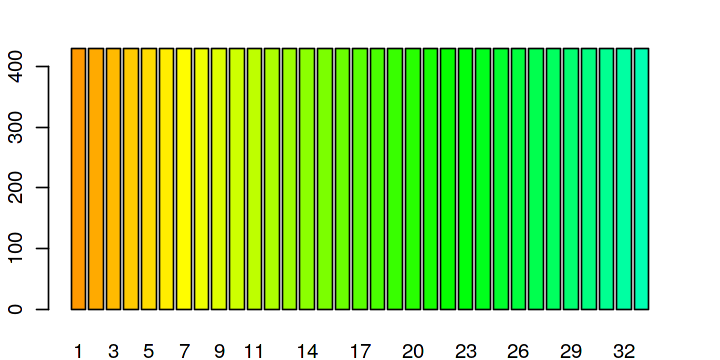

In [7]:
options(repr.plot.width=6,repr.plot.height=3)
par(mar=c(2,2,2,2))
letter_labels %>% 
    table() %>% barplot(col=rainbow(33,start=.1,end=.45))

[1] 32 32  1  4

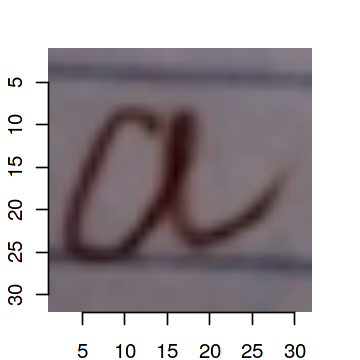

In [8]:
im<-load.image("../input/letters/01_05.png")
options(repr.plot.width=3,repr.plot.height=3)
par(mar=c(2,2,2,2))
dim(im); plot(im)

[1] 32 32 22

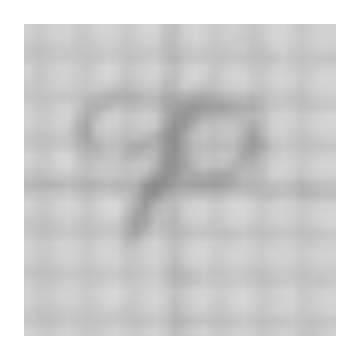

In [9]:
options(repr.plot.width=3,repr.plot.height=3)
par(mar=c(1,1,1,1))
image_example<-df[100,1:1024]
image_example<-array_reshape(as.matrix(df[100,1:1024]),c(32,32))
c(dim(image_example),which(df[100,1025:1057]==1))
plot(as.raster(image_example))

In [10]:
train_indices<-1:round(0.8*nrow(df))
valid_indices<-(round(0.8*nrow(df))+1):round(0.9*nrow(df))
test_indices<-(round(0.9*nrow(df))+1):nrow(df)
x_train<-as.matrix(df[train_indices,1:1024])
y_train<-as.matrix(df[train_indices,1025:1057])
x_valid<-as.matrix(df[valid_indices,1:1024])
y_valid<-as.matrix(df[valid_indices,1025:1057])
x_test<-as.matrix(df[test_indices,1:1024])
y_test<-as.matrix(df[test_indices,1025:1057])
c(dim(x_train),dim(x_valid),dim(x_test),
  dim(y_train),dim(y_valid),dim(y_test))

[1] 11352  1024  1419  1024  1419  1024 11352    33  1419    33  1419    33

<h1 class='font-effect-3d-float' style='font-family:Akronim; color:#FF9966; font-size:250%;'> One-Label Classification Models</h1>

In [11]:
gray_cnn_model<-keras_model_sequential()
gray_cnn_model %>%  
layer_conv_2d(filter=32,kernel_size=c(5,5),padding="same",
              input_shape=c(32,32,1) ) %>%  
layer_activation_leaky_relu(alpha=.02) %>%  
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.2) %>%
layer_conv_2d(filter=256,kernel_size=c(5,5)) %>% 
layer_activation_leaky_relu(alpha=.02) %>%  
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.2) %>%
layer_global_max_pooling_2d() %>%  
layer_dense(1024) %>%  
layer_activation_leaky_relu(alpha=.02) %>%  
layer_dropout(.5) %>%  
layer_dense(33) %>%    
layer_activation("softmax")
gray_cnn_model %>%
  compile(loss="categorical_crossentropy",
          optimizer="rmsprop",metrics="accuracy")

In [12]:
d<-c(-1,32,32,1)
cb<-list(callback_model_checkpoint(fw,save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.8))
gray_cnn_fit<-gray_cnn_model %>%
    fit(x=array_reshape(x_train,d),y=y_train,
        validation_data=list(array_reshape(x_valid,d),y_valid),
        shuffle=T,batch_size=64,epochs=100,callbacks=cb)

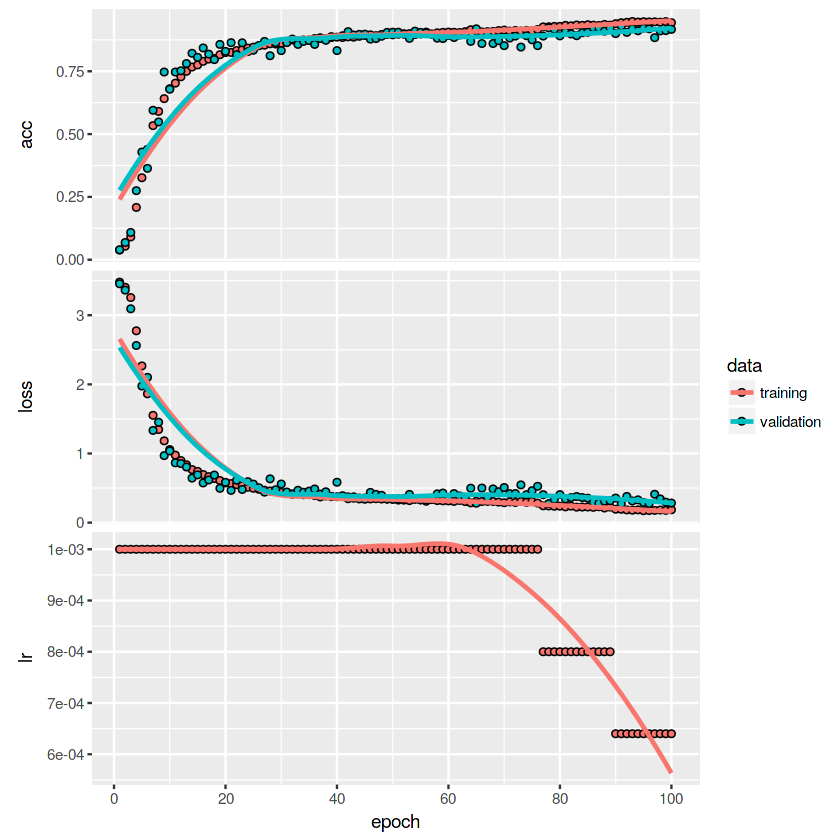

In [13]:
options(warn=-1,repr.plot.width=7,repr.plot.height=7)
plot(gray_cnn_fit)

In [14]:
gray_cnn_fit_df<-as.data.frame(gray_cnn_fit)
gray_cnn_fit_df[201:250,1:4]

,epoch,value,metric,data
201,1,0.03946441,acc,validation
202,2,0.06835800,acc,validation
203,3,0.10852713,acc,validation
204,4,0.27484144,acc,validation
205,5,0.42847075,acc,validation
206,6,0.36363636,acc,validation
207,7,0.59478506,acc,validation
208,8,0.54827343,acc,validation
209,9,0.74700493,acc,validation
210,10,0.67864693,acc,validation


In [15]:
load_model_weights_hdf5(gray_cnn_model,fw)
gray_cnn_model %>% 
    evaluate(array_reshape(x_test,d),y_test)

$loss
[1] 0.2565895

$acc
[1] 0.9260042

In [16]:
gray_mlp_model<-keras_model_sequential()
gray_mlp_model %>%  
layer_dense(128,input_shape=c(32*32)) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%  
layer_dense(256) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%
layer_dense(512) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%
layer_dense(1024) %>%  
layer_activation("relu") %>%  
layer_dropout(.25) %>% 
layer_dense(33) %>%    
layer_activation("softmax")
gray_mlp_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="nadam",metrics="accuracy")

In [17]:
cb<-list(callback_model_checkpoint(fw,save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.8))
gray_mlp_fit<-gray_mlp_model %>%
    fit(x=x_train,y=y_train,callbacks=cb,
        validation_data=list(x_valid,y_valid),
        shuffle=T,batch_size=128,epochs=300)

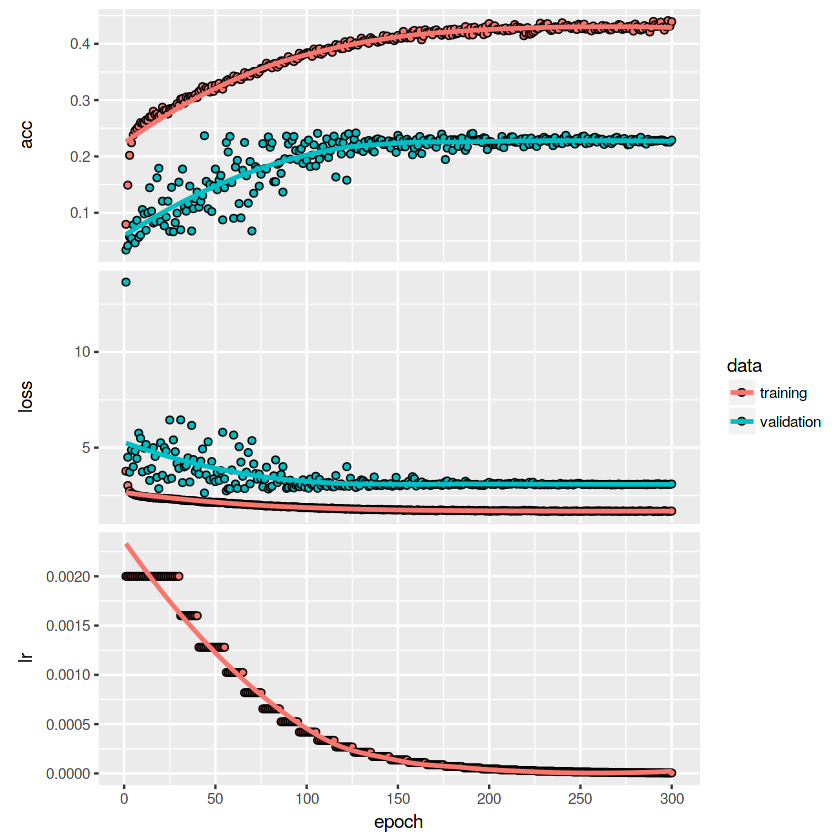

In [18]:
options(warn=-1,repr.plot.width=7,repr.plot.height=7)
plot(gray_mlp_fit)

In [19]:
load_model_weights_hdf5(gray_mlp_model,fw)
gray_mlp_model %>% 
    evaluate(x_test,y_test)

$loss
[1] 2.640588

$acc
[1] 0.2367865